In [2]:
import kaggle

kaggle.api.dataset_download_files('nimishsawant/bankfull', 
                                  path='E:/Projects/Machine Learning Projects/Raw Data/Classification',
                                  unzip=True)

Dataset URL: https://www.kaggle.com/datasets/nimishsawant/bankfull


In [14]:
def import_DA():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import warnings
    warnings.filterwarnings('ignore')
    pd.set_option('display.max_columns', None)
    print("Lib Installed")
    return pd, np, plt, sns
pd, np, plt, sns = import_DA()

def import_ML():
    from sklearn.model_selection import train_test_split as tts
    from sklearn.preprocessing import StandardScaler as SS
    from sklearn.preprocessing import LabelEncoder as LE 
    from sklearn.metrics import r2_score as r2 
    from lazypredict.Supervised import LazyClassifier as LC
    return tts, SS, LE, r2, LC
tts, SS, LE, r2, LC = import_ML()

Lib Installed


In [2]:
Bank = pd.read_csv(f"E:/Projects/Machine Learning Projects/Raw Data/Classification/bank-full.csv")
Bank.info(), Bank.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome Target  
 0  unknown    5   may       261         1     -1         0  unknown     no  
 1  unknown    5   may       151         1     -1         0  unknown     no  
 2  unknown    5   may        76         1     -1         0  unknown     no  
 3  unknown    5   may        92         1     -1         0  unknown     no  
 4  unknown    5   may       198         1     -1         0  unknown     no  )

In [11]:
bank_cop = Bank.copy()

In [12]:
LE = LE()
obj = bank_cop.select_dtypes(include=['object']).columns
for i in obj:
    bank_cop[i] = LE.fit_transform(bank_cop[i])

bank_cop.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0


In [6]:
def plot(data, x=None, y=None, style='hist', **kwargs):
    sns.set()
    plt.figure(figsize=(15,5))
    if style == 'hist':
        sns.histplot(data=data, x=x, kde=True, kde_kws=dict(cut=3),**kwargs)
    elif style == 'box':
        sns.boxplot(data=data, x=x, y=y, **kwargs)
    elif style == 'scatter':
        sns.scatterplot(data=data, x=x, y=y, **kwargs)
    else:
        raise ValueError(f"Unaccepted Plot Style {style}")
    plt.show()    

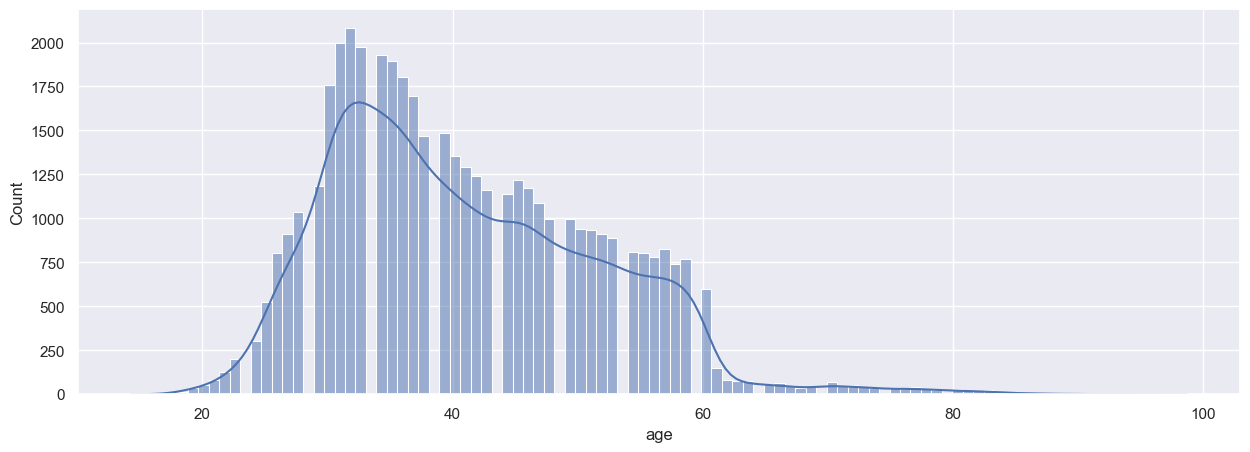

In [ ]:
plot(Bank, x='age', style='hist')

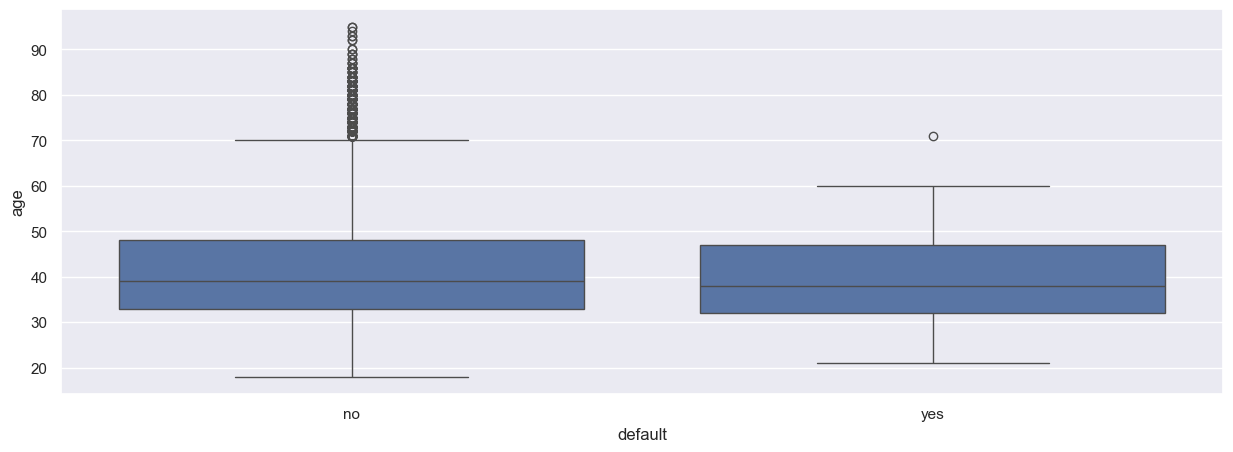

In [9]:
plot(Bank, x='default', y='age', style='box')

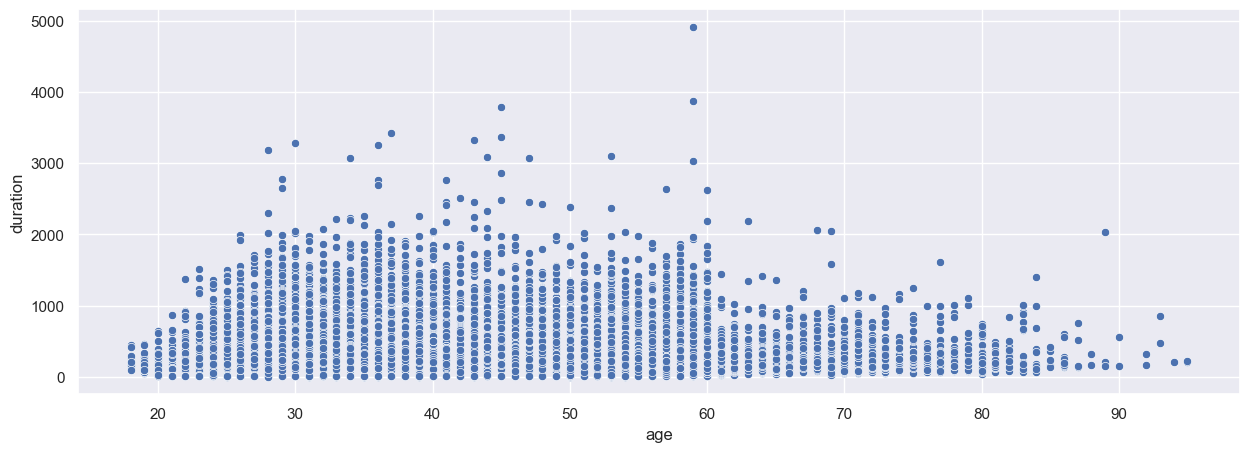

In [10]:
plot(Bank, x='age', y='duration', style='scatter')

ML SESSION

---

In [ ]:
X = bank_cop.drop(['default'], axis=1)
y = bank_cop['default']

SS = SS()
X = SS.fit_transform(X)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
clas = LC(verbose=0, random_state=42, custom_metric=None)
models, predictions = clas.fit(X_train, X_test, y_train, y_test)

 38%|███▊      | 12/32 [00:20<00:40,  2.04s/it]